In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [21]:
from tensorflow import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [43]:
# API - Sequential
from keras import Sequential
from keras.layers import Dense

In [44]:
x,y = make_moons(n_samples=200,noise = 0.05,random_state=101)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


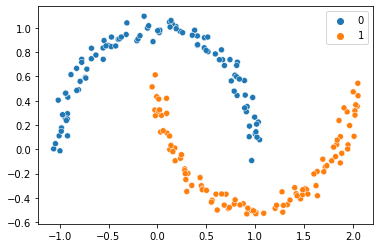

In [45]:
sns.scatterplot(x[:,0],x[:,1],hue=y)

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=101)

In [47]:
model = Sequential()
model.add(Dense(250,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
# Without Early Stopping - 
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1000)

Epoch 1/1000
5/5 [==============================] - 1s 50ms/step - loss: 0.6895 - accuracy: 0.6200 - val_loss: 0.6625 - val_accuracy: 0.8400
Epoch 2/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.6480 - accuracy: 0.8200 - val_loss: 0.6199 - val_accuracy: 0.8200
Epoch 3/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.6115 - accuracy: 0.8133 - val_loss: 0.5814 - val_accuracy: 0.8200
Epoch 4/1000
5/5 [==============================] - 0s 15ms/step - loss: 0.5794 - accuracy: 0.8067 - val_loss: 0.5471 - val_accuracy: 0.8200
Epoch 5/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5478 - accuracy: 0.8067 - val_loss: 0.5177 - val_accuracy: 0.8200
Epoch 6/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.5221 - accuracy: 0.8067 - val_loss: 0.4903 - val_accuracy: 0.8200
Epoch 7/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.4980 - accuracy: 0.8067 - val_loss: 0.4657 - val_accuracy: 0.8200
Epoch 8/1000


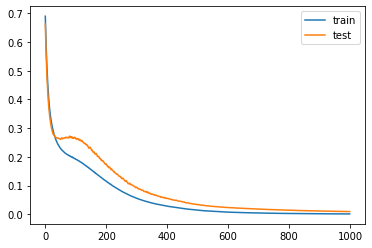

In [28]:
#plotting train and test
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

#### Early Stopping - 

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [50]:
# With EarlyStopping -
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1000,callbacks=callback)

Epoch 1/1000
5/5 [==============================] - 1s 62ms/step - loss: 0.6531 - accuracy: 0.8000 - val_loss: 0.6155 - val_accuracy: 0.8400
Epoch 2/1000
5/5 [==============================] - 0s 17ms/step - loss: 0.6154 - accuracy: 0.8333 - val_loss: 0.5786 - val_accuracy: 0.8200
Epoch 3/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.5802 - accuracy: 0.8333 - val_loss: 0.5453 - val_accuracy: 0.8200
Epoch 4/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.5506 - accuracy: 0.8267 - val_loss: 0.5145 - val_accuracy: 0.8200
Epoch 5/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.5222 - accuracy: 0.8200 - val_loss: 0.4869 - val_accuracy: 0.8200
Epoch 6/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.4958 - accuracy: 0.8267 - val_loss: 0.4626 - val_accuracy: 0.8200
Epoch 7/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.4733 - accuracy: 0.8333 - val_loss: 0.4404 - val_accuracy: 0.8200
Epoch 8/1000


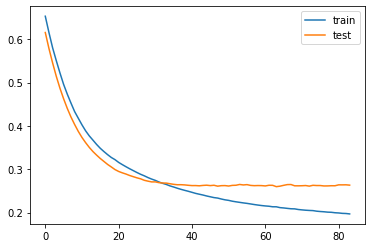

In [51]:
#plotting train and test
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()